In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# Full path to file 1
file_1 = '../Fetch_data/data/indices/DOW_JONES_2020_2024.csv'  # Replace with the actual path to the single file

# Folder 2 containing the remaining 30 files
folder_2 = '../Fetch_data/data/US-30/'

folder_3 = '../Fetch_data/data/Extra10/'




# List of CSV files in folder 2
folder_2_files = [os.path.join(folder_2, file) for file in os.listdir(folder_2) if file.endswith('.csv')]

# List of CSV files in folder 2
folder_3_files = [os.path.join(folder_3, file) for file in os.listdir(folder_3) if file.endswith('.csv')]

# Combine file_1 with the list of files from folder 2
files = [file_1] + folder_2_files + folder_3_files



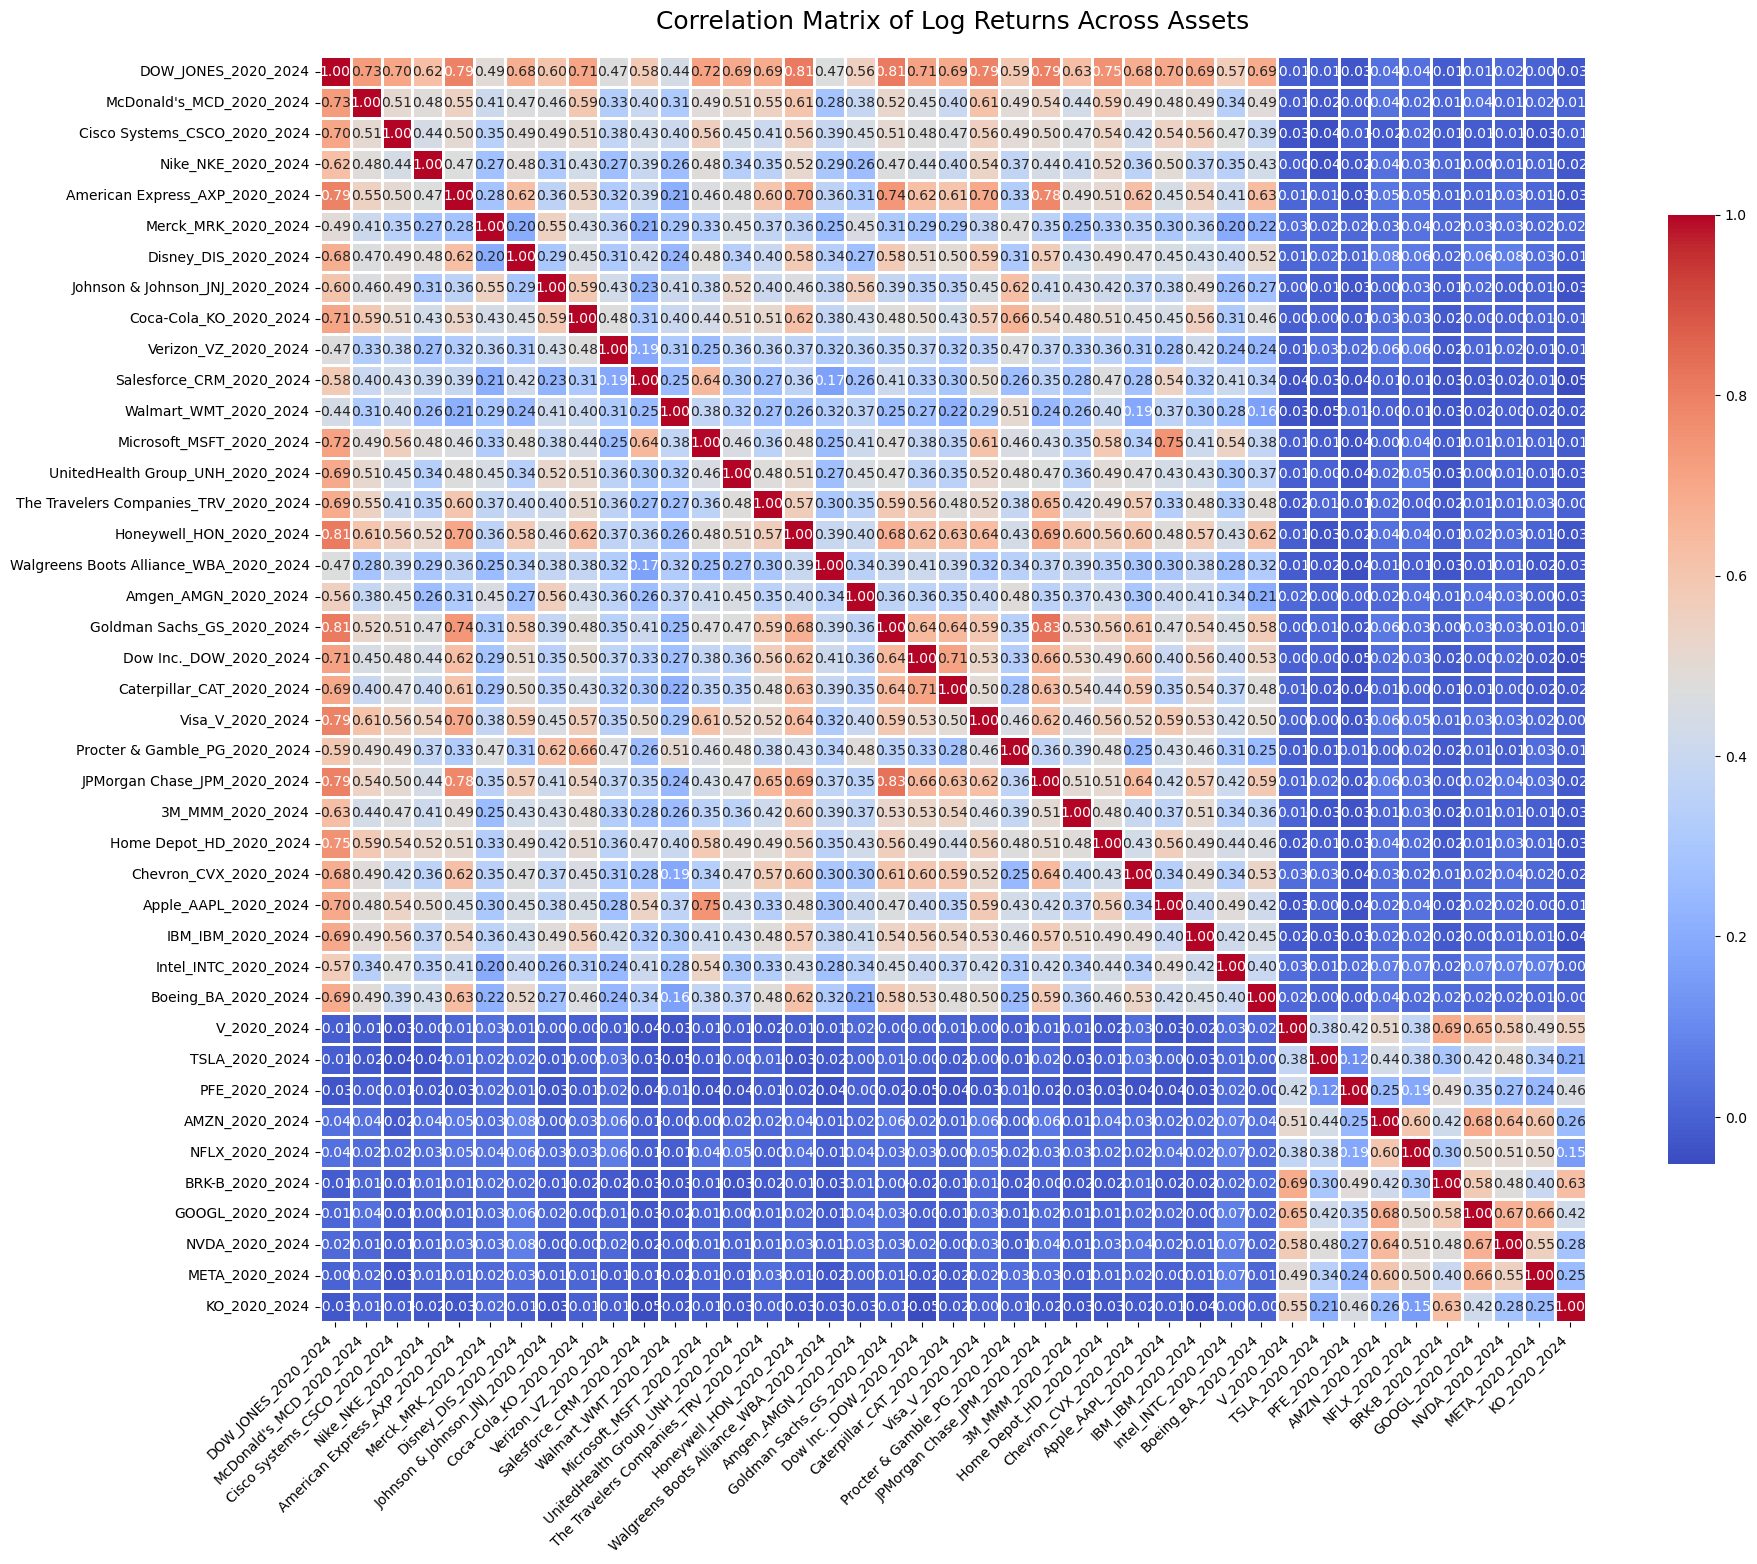

In [16]:
# Function to calculate Log Returns and create a correlation matrix heatmap
def correlation_analysis(files):
    log_returns_df = pd.DataFrame()
    
    # Loop through each file and calculate the Log Returns
    for file_path in files:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Calculate Log Returns
        df['Log Return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
        
        # Add the Log Returns to a new DataFrame with the stock name as the column
        stock_name = file_path.split("/")[-1].replace('.csv', '')
        log_returns_df[stock_name] = df['Log Return']
    
    # Calculate the correlation matrix of Log Returns
    correlation_matrix = log_returns_df.corr()
    
    # Plot the correlation matrix as a heatmap with improved readability
    plt.figure(figsize=(20, 16))  # Increase figure size for readability
    
    # Use a higher contrast color palette, increase font size for annotations
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.9,
                annot_kws={'size': 10}, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
                cbar_kws={"shrink": 0.75}, square=True)

    # Adjust label rotation and font size
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    
    # Add title with a larger font size and increase layout padding
    plt.title("Correlation Matrix of Log Returns Across Assets", fontsize=18, pad=20)
    plt.tight_layout(pad=2)  # Add padding to avoid clipping of labels
    plt.show()

# Perform correlation analysis and plot the heatmap
correlation_analysis(files)
